In [2]:
# Install YOLOv8
!pip install ultralytics

# Verify install
import ultralytics
ultralytics.checks()


Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.4/8062.4 GB disk)


In [6]:
import random
import numpy as np

import torch

def set_seed(seed: int = 42) -> None:
    """Make experiments deterministic (as much as possible)."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


set_seed(42)

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8s-seg.pt")  
model.train(
    data="/kaggle/input/clothing-seg/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    project="clothing_segmentation",
    name="yolov8s_seg"
)


Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/clothing-seg/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_seg2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        226        408      0.744      0.633      0.712      0.619      0.739       0.63      0.704      0.589
                  coat         37         38      0.642      0.447      0.525      0.382      0.604      0.421      0.492      0.338
                 dress         53         53      0.728      0.807      0.838      0.702      0.728      0.807      0.836      0.735
                jacket         48         48       0.63      0.521      0.657      0.622       0.63      0.521      0.649      0.463
                 pants         67         67      0.917      0.824      0.938       0.86      0.917      0.824      0.934      0.846
                 shirt         52         55       0.56      0.486       0.49      0.415       0.56      0.487      0.484       0.38
                shorts         36         36          1      0.774      0.903      0.774          1      0.774      0.903      0.795
                 skirt         55         55      0.823      0.655   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7959146252d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0

In [9]:
# Evaluate model on test set
metrics = model.val(split="test")
print(metrics)


Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,782,696 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.9±8.7 MB/s, size: 37.8 KB)
val: Scanning /kaggle/input/clothing-seg/test/labels... 109 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 109/109 395.2it/s 0.3s1s
WARNING ⚠️ val: Cache directory /kaggle/input/clothing-seg/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.0it/s 3.5s0.4sss


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        109        191      0.706      0.602      0.705      0.635      0.711      0.607      0.712      0.619
                  coat         17         20      0.753      0.609      0.646      0.558      0.752      0.608      0.646      0.508
                 dress         25         25      0.539       0.68      0.752      0.609       0.54       0.68      0.752      0.657
                jacket         16         16      0.649      0.438      0.629      0.594      0.649      0.438      0.629      0.546
                 pants         24         24      0.743      0.792      0.822      0.778      0.782      0.833      0.865      0.774
                 shirt         28         29      0.644      0.483      0.613      0.584      0.644      0.483      0.613      0.549
                shorts         22         22      0.887      0.727      0.884      0.788      0.888      0.727      0.884      0.752
                 skirt         27         27      0.666      0.517   


image 1/1 /kaggle/input/clothing-seg/test/images/003d41dd20f271d27219fe7ee6de727d_jpg.rf.3d641e15b38fd33ceea80cba1ce27cef.jpg: 640x640 1 shirt, 1 shorts, 21.0ms
Speed: 2.3ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to clothing_segmentation/yolov8s_seg24


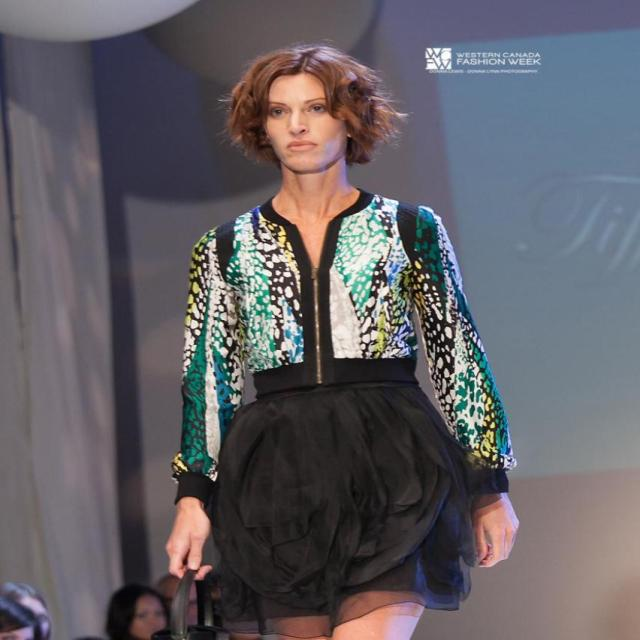

In [12]:
# Run inference on test images
results = model.predict(source="/kaggle/input/clothing-seg/test/images/003d41dd20f271d27219fe7ee6de727d_jpg.rf.3d641e15b38fd33ceea80cba1ce27cef.jpg", save=True, conf=0.5)

# Show a sample result
from IPython.display import Image
Image(filename="/kaggle/input/clothing-seg/test/images/003d41dd20f271d27219fe7ee6de727d_jpg.rf.3d641e15b38fd33ceea80cba1ce27cef.jpg")  # check output folder


In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/kaggle/working/yolov8s-seg.pt")

# Run inference on an image
results = model.predict(source="/kaggle/input/clothing-seg/test/images/1c929f3b53b9e67dbf5986309a244aaa_jpg.rf.8f7d7f8beee07fdf19d04782ed993700.jpg", save=True, conf=0.5)

# Check first prediction
from IPython.display import Image
Image(filename="/kaggle/input/clothing-seg/test/images/1c929f3b53b9e67dbf5986309a244aaa_jpg.rf.8f7d7f8beee07fdf19d04782ed993700.jpg")
